In [1]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score


In [2]:
df=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/SPAIN/household/2015/EPFhogar_2015.csv',sep="\t")

In [3]:
df

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,...,FUENPRIN,FUENPRINRED,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
0,2016,1,7,4,6,5,3,2,2,742.998897,...,1,1,1225,3,2,8,0,0,0,8
1,2016,2,12,1,6,2,1,1,2,1849.021419,...,7,3,676,2,2,38,0,0,0,38
2,2016,3,13,3,1,1,1,1,1,1580.183563,...,2,2,5868,8,4,89,0,0,10,99
3,2016,4,8,4,6,5,3,2,2,846.366967,...,2,2,3769,7,4,116,0,0,0,116
4,2016,5,13,3,6,1,1,2,2,1359.668063,...,2,2,1271,3,1,84,0,0,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22006,2016,22007,5,7,6,4,2,1,1,1552.957474,...,2,2,1747,4,1,31,0,0,0,31
22007,2016,22008,9,5,1,1,1,1,1,1745.391591,...,2,2,3500,7,2,84,0,0,6,90
22008,2016,22009,8,4,6,5,3,1,1,906.283671,...,3,3,784,2,1,0,0,0,0,0
22009,2016,22010,3,1,6,2,1,1,1,391.171029,...,3,3,1633,4,1,56,0,0,8,64


In [4]:
for col in df.columns:
    print(col)

ANOENC
NUMERO
CCAA
NUTS1
CAPROV
TAMAMU
DENSIDAD
CLAVE
CLATEO
FACTOR
NMIEMB
TAMANO
NMIEMSD
NMIEMHU
NMIEMIN
NMIEM1
NMIEM2
NMIEM3
NMIEM4
NMIEM5
NMIEM6
NMIEM7
NMIEM8
NMIEM9
NMIEM10
NMIEM11
NMIEM12
NMIEM13
NUMACTI
NUMINACTI
NUMOCU
NUMNOCU
NUMESTU
NUMNOESTU
NNINOSD
NHIJOSD
UC1
UC2
PF2TEO
PF2RECO
TIPHOGAR1
TIPHOGAR2
TIPHOGAR3
TIPHOGAR4
TIPHOGAR5
TIPHOGAR6
TIPHOGAR7
TIPHOGAR8
TIPHOGAR9
TIPHOGAR10
TIPHOGAR11
SITUOCUHOG
SITUACTHOG
NORDENSP
EDADSP
SEXOSP
PAISNACSP
NACIONASP
PAISSP
SITURESSP
ECIVILLEGALSP
NORDENCOSP
UNIONSP
CONVIVENCIASP
NORDENPASP
PAISPADRESP
NORDENMASP
PAISMADRESP
ESTUDIOSSP
ESTUDREDSP
SITUACTSP
SITUREDSP
OCUSP
JORNADASP
PERCEPSP
IMPEXACPSP
INTERINPSP
TRABAJO
OCUPA
OCUPARED
ACTESTB
ACTESTBRED
SITPROF
SECTOR
CONTRATO
TIPOCONT
SITSOCI
SITSOCIRE
REGTEN
TIPOEDIF
ZONARES
TIPOCASA
NHABIT
ANNOCON
SUPERF
AGUACALI
FUENAGUA
CALEF
FUENCALE
DISPOSIOV
NUMOVD
REGTENV1
MESESV1
DIASV1
AGUACV1
FUENACV1
CALEFV1
FUENCAV1
REGTENV2
MESESV2
DIASV2
AGUACV2
FUENACV2
CALEFV2
FUENCAV2
REGTENV3
MESESV3
DI

In [5]:
var15=df[['TAMANO','NMIEMSD','UC1','UC2','ESTUDIOSSP','SITUACTSP','JORNADASP','IMPEXACPSP','OCUPA','SITPROF','SECTOR','TIPOEDIF','ZONARES','TIPOCASA','NHABIT','SUPERF','NUMOVD','CAPROP','CAJENA','PENSIO','FUENPRIN']]
var15

,TAMANO,NMIEMSD,UC1,UC2,ESTUDIOSSP,SITUACTSP,JORNADASP,IMPEXACPSP,OCUPA,SITPROF,...,TIPOEDIF,ZONARES,TIPOCASA,NHABIT,SUPERF,NUMOVD,CAPROP,CAJENA,PENSIO,FUENPRIN
0,2,0,1.7,1.5,2,1,1,-9.0,5,3,...,2,5,2,5,96,NaN,1,6,6,1
1,2,0,1.7,1.5,7,3,,-9.0,2,1,...,2,3,2,5,-9,NaN,1,1,6,7
2,4,0,3.1,2.5,3,1,1,-9.0,2,1,...,4,3,2,6,155,NaN,6,1,6,2
3,4,0,3.1,2.5,3,3,,-9.0,6,1,...,2,7,2,8,150,NaN,6,1,6,2
4,3,0,2.2,1.8,4,1,1,-9.0,7,1,...,4,3,2,5,98,NaN,6,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22006,2,0,1.7,1.5,4,1,1,-9.0,5,1,...,4,3,2,2,50,NaN,6,1,6,2
22007,4,0,2.7,2.1,6,1,1,1800.0,2,1,...,2,2,1,6,130,NaN,6,1,6,2
22008,1,0,1.0,1.0,1,4,,-9.0,9,1,...,2,7,2,6,70,1.0,6,6,1,3
22009,2,0,1.7,1.5,2,4,,1633.0,7,1,...,3,3,2,5,75,1.0,6,6,1,3


In [6]:
# Get the number of null values in each column
null_counts = var15.isna().sum()

# Display the null counts for each column
print(null_counts)

TAMANO            0
NMIEMSD           0
UC1               0
UC2               0
ESTUDIOSSP        0
SITUACTSP         0
JORNADASP         0
IMPEXACPSP      201
OCUPA             0
SITPROF           0
SECTOR            0
TIPOEDIF          0
ZONARES           0
TIPOCASA          0
NHABIT            0
SUPERF            0
NUMOVD        18409
CAPROP            0
CAJENA            0
PENSIO            0
FUENPRIN          0
dtype: int64


In [7]:
#input 0 as if values are null it means they do not have
var15=var15.fillna(0)
var15.isnull().sum()

TAMANO        0
NMIEMSD       0
UC1           0
UC2           0
ESTUDIOSSP    0
SITUACTSP     0
JORNADASP     0
IMPEXACPSP    0
OCUPA         0
SITPROF       0
SECTOR        0
TIPOEDIF      0
ZONARES       0
TIPOCASA      0
NHABIT        0
SUPERF        0
NUMOVD        0
CAPROP        0
CAJENA        0
PENSIO        0
FUENPRIN      0
dtype: int64

In [8]:
# Calculate some basic statistics on the numeric columns of the DataFrame
print(var15.describe())

             TAMANO       NMIEMSD           UC1           UC2    ESTUDIOSSP  \
count  22011.000000  22011.000000  22011.000000  22011.000000  22011.000000   
mean       2.653037      0.001408      2.085121      1.752742      3.908773   
std        1.212633      0.037503      0.790631      0.545425      1.722091   
min        1.000000      0.000000      1.000000      1.000000      1.000000   
25%        2.000000      0.000000      1.700000      1.500000      3.000000   
50%        2.000000      0.000000      1.700000      1.500000      3.000000   
75%        4.000000      0.000000      2.700000      2.100000      5.000000   
max        6.000000      1.000000     10.100000      7.100000      8.000000   

          SITUACTSP    IMPEXACPSP      TIPOEDIF       ZONARES      TIPOCASA  \
count  22011.000000  22011.000000  22011.000000  22011.000000  22011.000000   
mean       2.418427    538.620372      3.011494      3.656263      1.941620   
std        1.723508    819.007495      1.073494    

              TAMANO   NMIEMSD       UC1       UC2  ESTUDIOSSP  SITUACTSP  \
TAMANO      1.000000  0.003752  0.982356  0.970370    0.097564  -0.358071   
NMIEMSD     0.003752  1.000000  0.004997  0.005697   -0.003638   0.033057   
UC1         0.982356  0.004997  1.000000  0.997692    0.071699  -0.327471   
UC2         0.970370  0.005697  0.997692  1.000000    0.061093  -0.314791   
ESTUDIOSSP  0.097564 -0.003638  0.071699  0.061093    1.000000  -0.395043   
SITUACTSP  -0.358071  0.033057 -0.327471 -0.314791   -0.395043   1.000000   
IMPEXACPSP  0.000276 -0.004182 -0.001215 -0.002203    0.124365  -0.006267   
TIPOEDIF   -0.073581  0.000726 -0.086530 -0.091731    0.167640  -0.070351   
ZONARES     0.005110 -0.004227  0.012739  0.016084   -0.222900   0.075933   
TIPOCASA   -0.067103 -0.018154 -0.070280 -0.072820   -0.175966   0.048542   
NHABIT      0.180182  0.004826  0.196157  0.202501    0.029274   0.051232   
SUPERF      0.156076  0.013786  0.164466  0.167821    0.142074  -0.038123   

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_96067/4109093783.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(var15.corr())
/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_96067/4109093783.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(var15.corr(), annot=True, cmap='coolwarm')


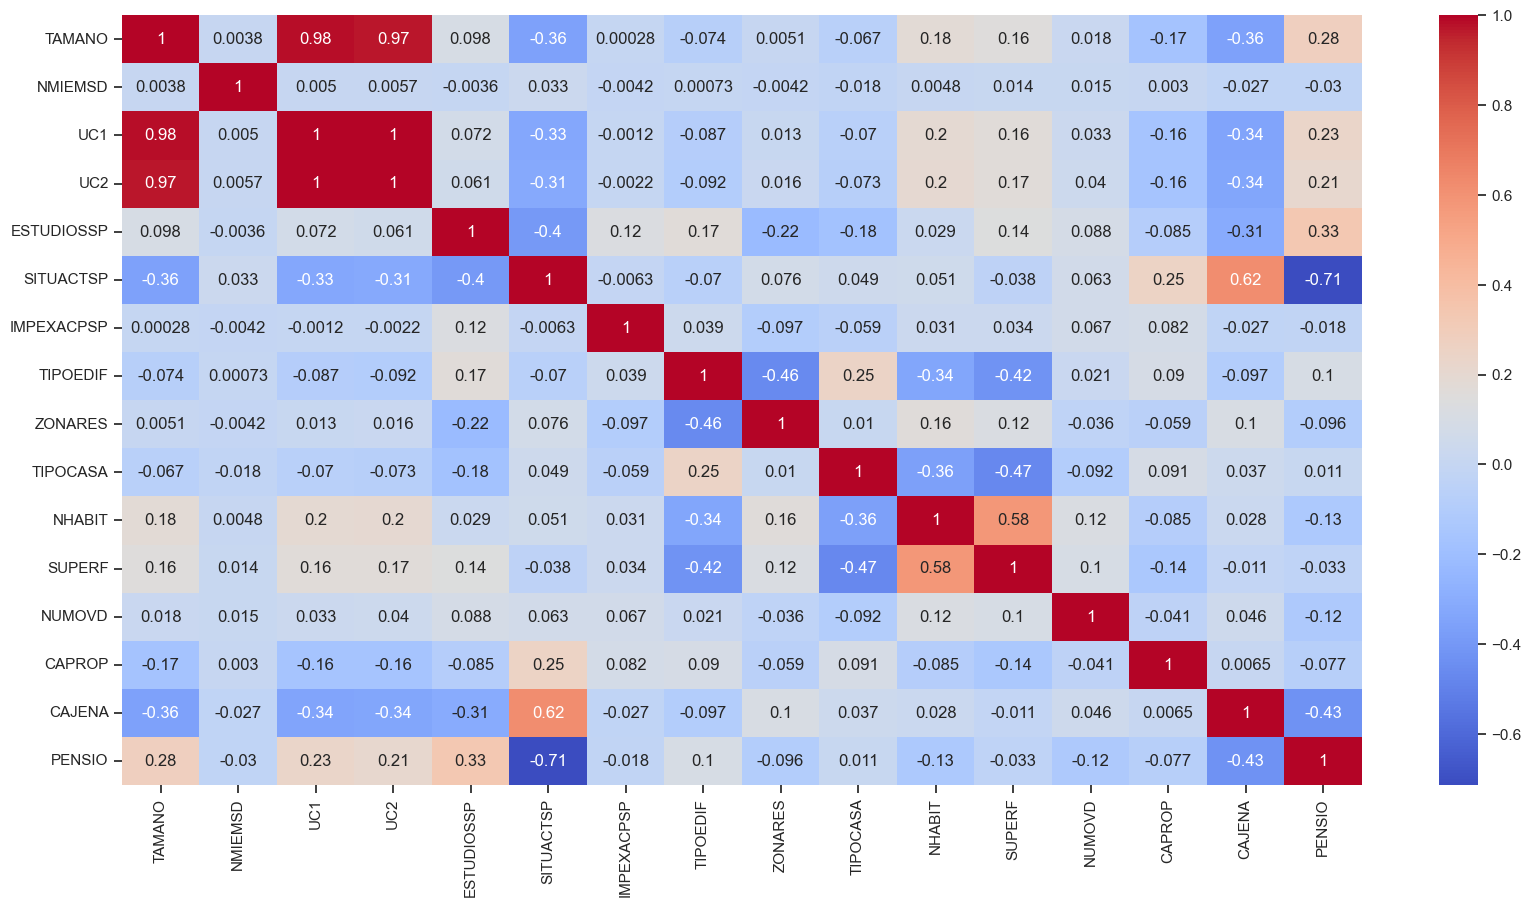

In [9]:
#correlation btw variables
print(var15.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var15.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
#drop one highly correlated
var15.drop(['UC1'], axis=1, inplace=True)

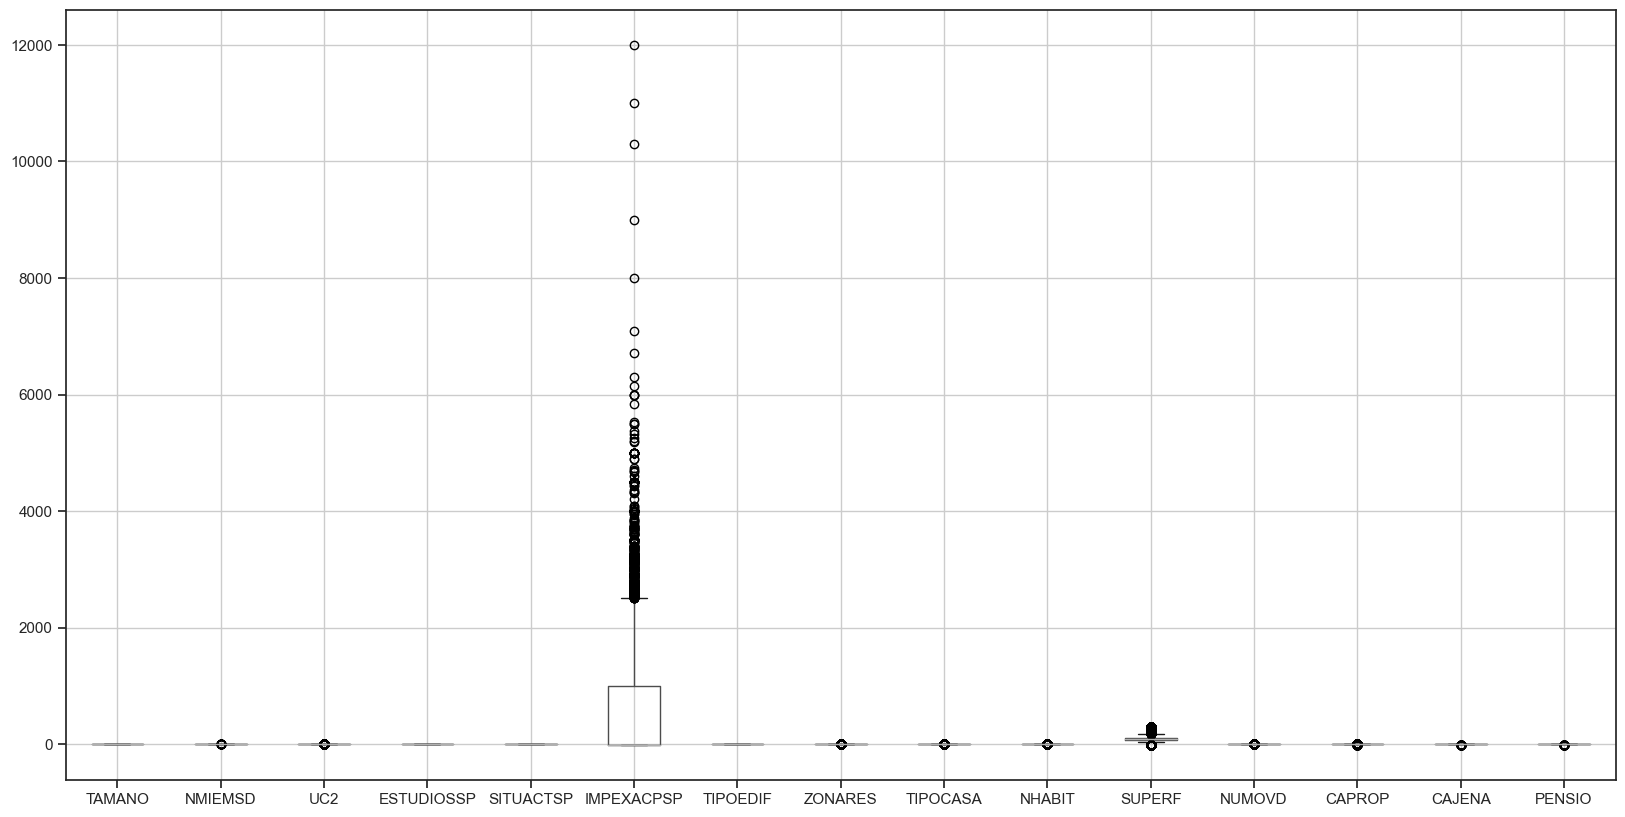

In [11]:
# create box plots for outliers for all columns in dataframe
var15.boxplot(figsize=(20,10))

# display the plot
plt.show()

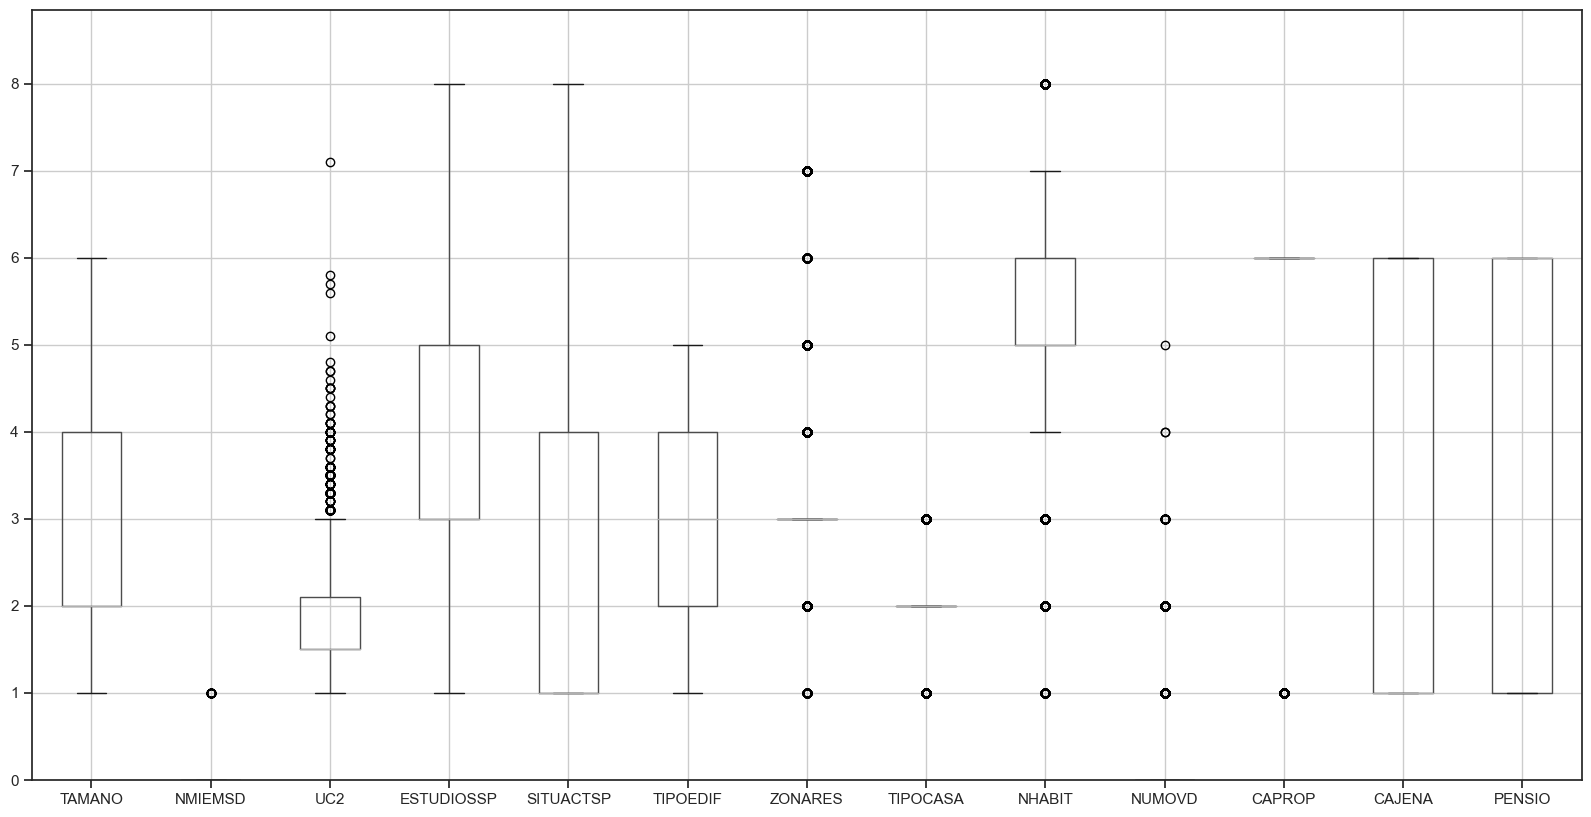

In [12]:
#check only for IMPEXACPSP and SUPERF and without them as scale cannot be seen
box=var15.drop(['IMPEXACPSP','SUPERF'],axis=1)
box.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

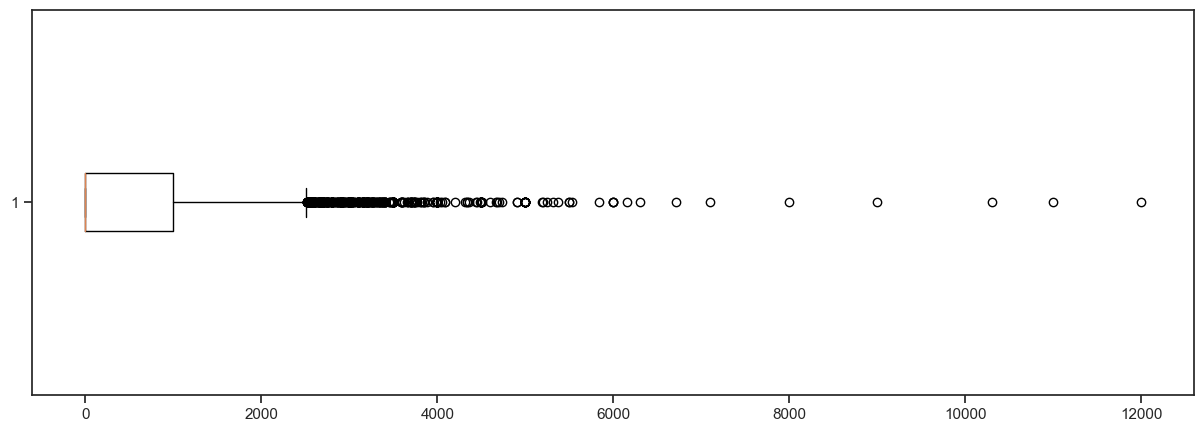

In [13]:
# create the boxplot
plt.boxplot(var15['IMPEXACPSP'],vert=False)
fig = plt.gcf()
fig.set_size_inches(15, 5)
# show the plot
plt.show()

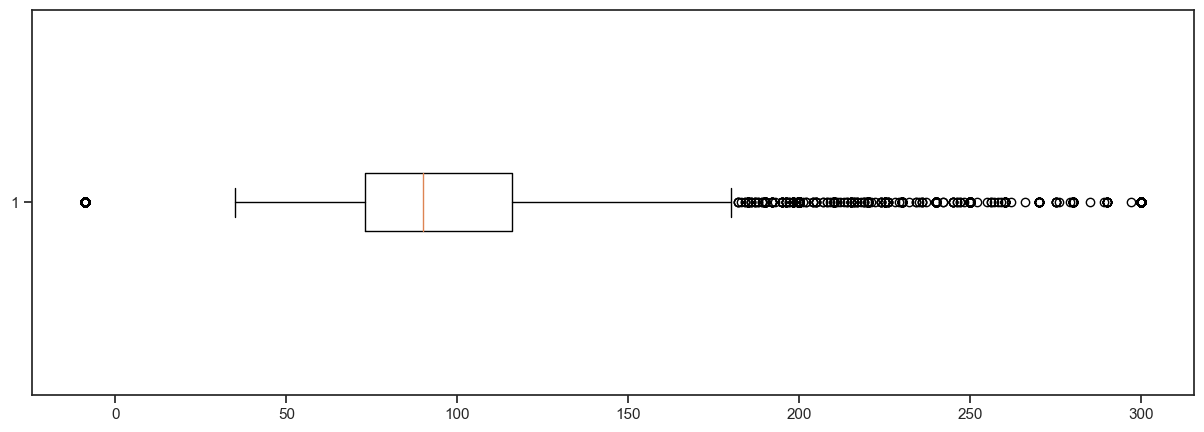

In [14]:
# create the boxplot
plt.boxplot(var15['SUPERF'],vert=False)
fig = plt.gcf()
fig.set_size_inches(15, 5)
# show the plot
plt.show()

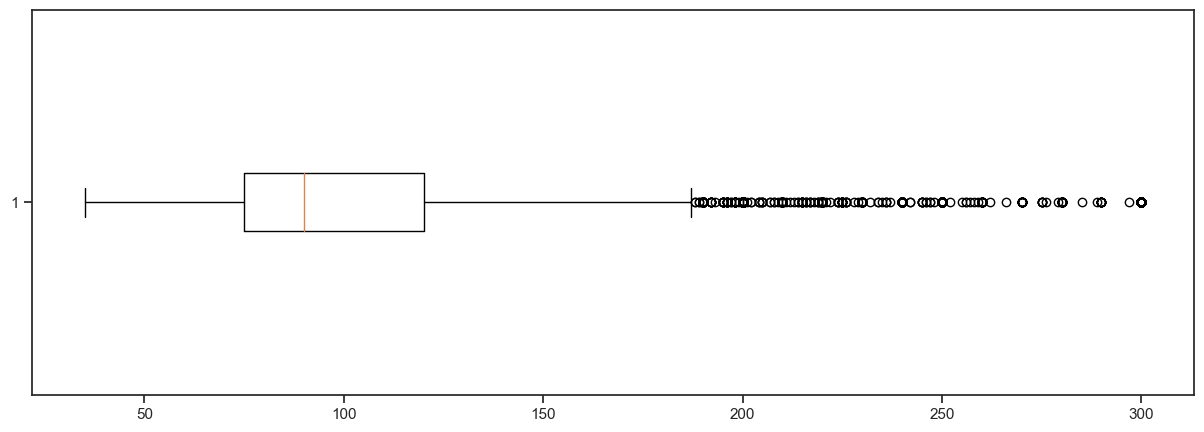

In [15]:
#delete outlier
var15 = var15[var15['SUPERF'] != -9]
plt.boxplot(var15['SUPERF'],vert=False)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

In [16]:
# Get the number of null values in each column
null_counts = var15.isna().sum()

# Display the null counts for each column
print(null_counts)

TAMANO        0
NMIEMSD       0
UC2           0
ESTUDIOSSP    0
SITUACTSP     0
JORNADASP     0
IMPEXACPSP    0
OCUPA         0
SITPROF       0
SECTOR        0
TIPOEDIF      0
ZONARES       0
TIPOCASA      0
NHABIT        0
SUPERF        0
NUMOVD        0
CAPROP        0
CAJENA        0
PENSIO        0
FUENPRIN      0
dtype: int64


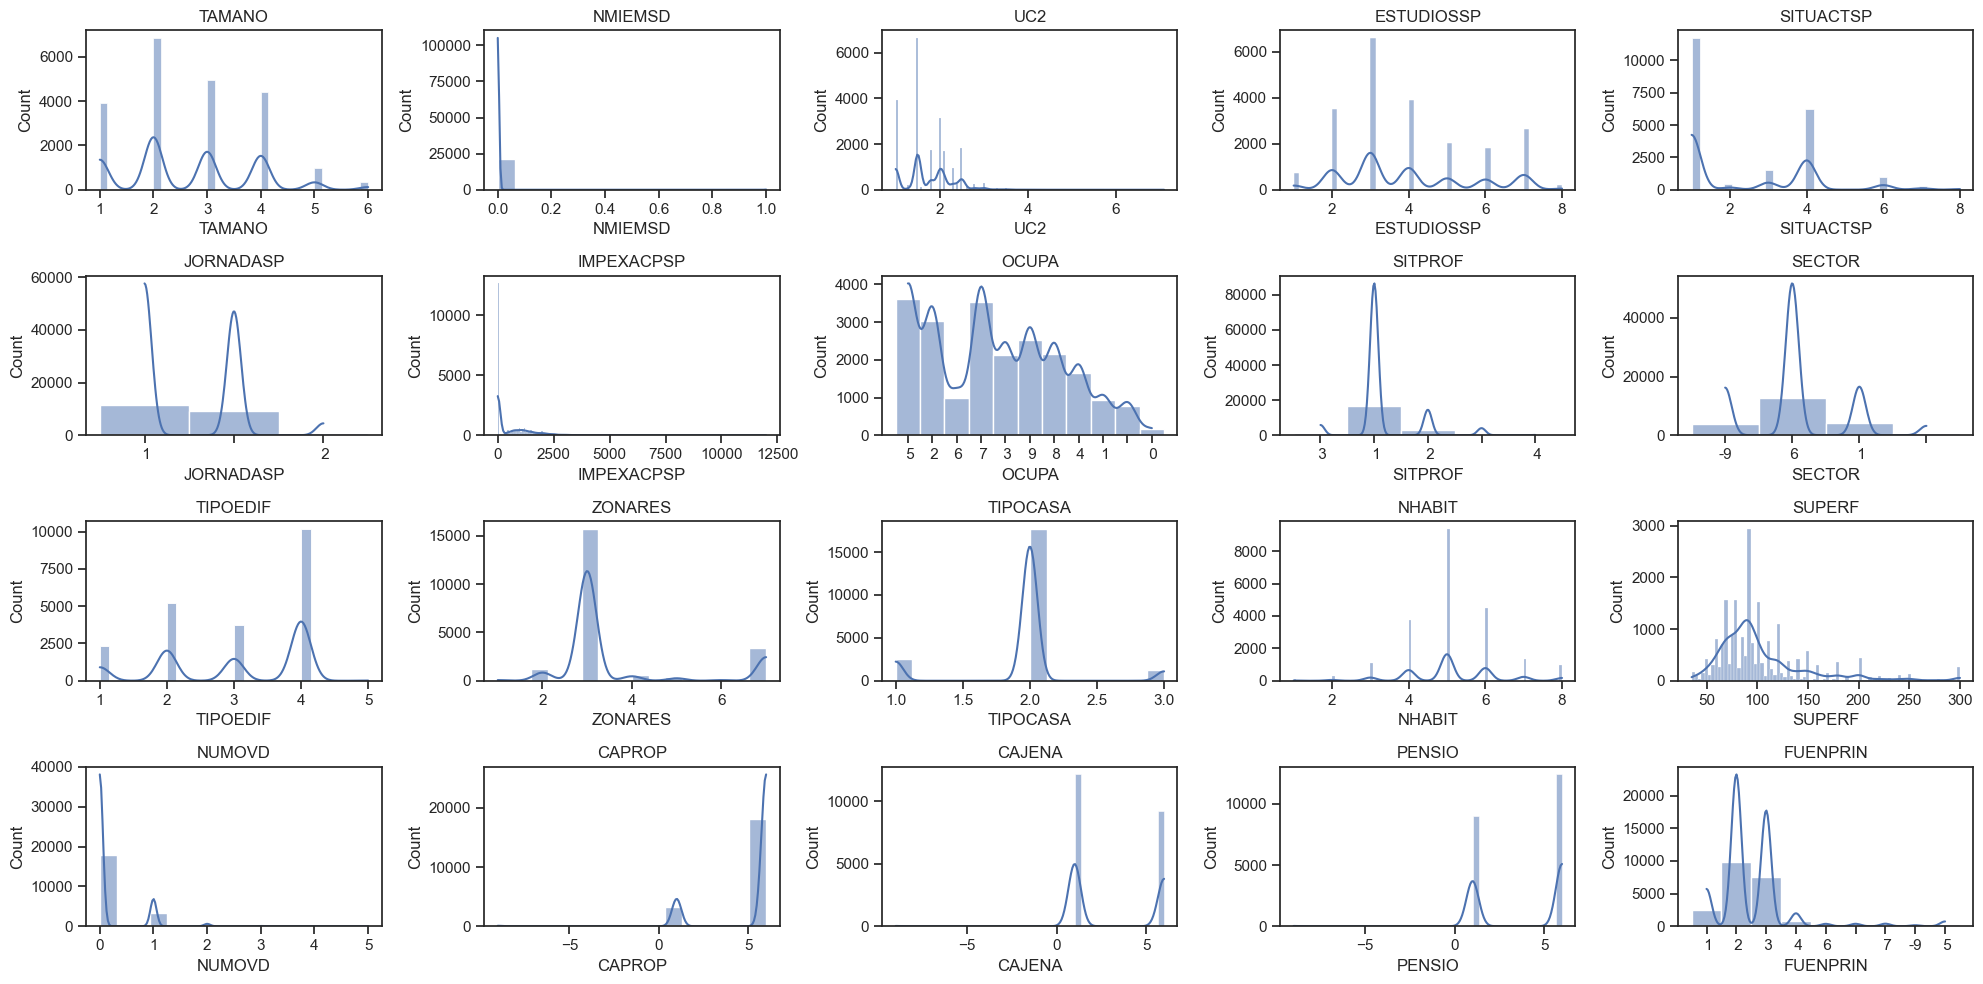

In [17]:
#standard deviation
# Set the number of rows and columns you want
num_rows = 4
num_cols = 5

# Get a list of all variable names in your dataset
variable_names = list(var15.columns)

# Calculate the number of figures you will need
num_figures = len(variable_names)

# Create a new figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Loop through each variable, creating a distribution plot on the appropriate subplot
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var15[var_name], ax=ax, kde=True)
    ax.set_title(var_name)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_96067/4051043457.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var15['IMPEXACPSP'], shade=True)


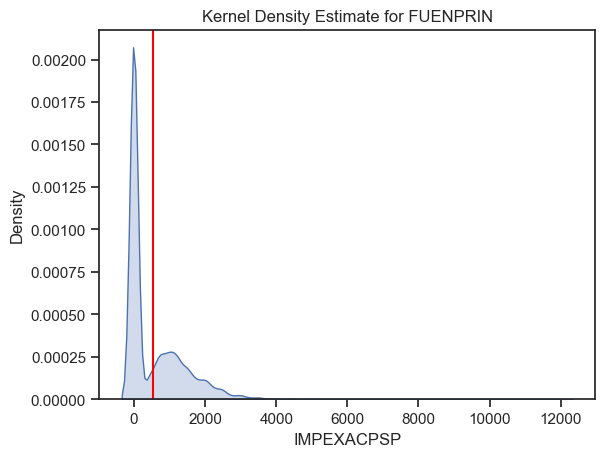

In [18]:
sns.kdeplot(data=var15['IMPEXACPSP'], shade=True)

# Add a vertical line at the mean value
mean_value = var15['IMPEXACPSP'].mean()
plt.axvline(x=mean_value, color='red')

# Add a title
plt.title(f"Kernel Density Estimate for {var_name}")

# Show the plot
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_96067/1538756857.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var15['SUPERF'], shade=True)


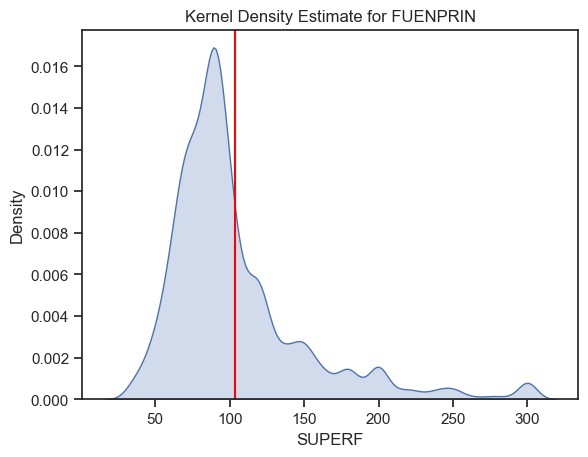

In [19]:
sns.kdeplot(data=var15['SUPERF'], shade=True)

# Add a vertical line at the mean value
mean_value = var15['SUPERF'].mean()
plt.axvline(x=mean_value, color='red')

# Add a title
plt.title(f"Kernel Density Estimate for {var_name}")

# Show the plot
plt.show()

In [21]:
# Replace empty strings with NaN values
var15 = var15.replace('  ', pd.NaT)

# Convert column to float
var15 = var15.fillna(0.0).astype(float)

In [22]:
#Preprocess the data:
#Standardize the dataset to ensure variables are on the same scale. This is important for distance-based clustering algorithms like K-means and hierarchical clustering.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(var15)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

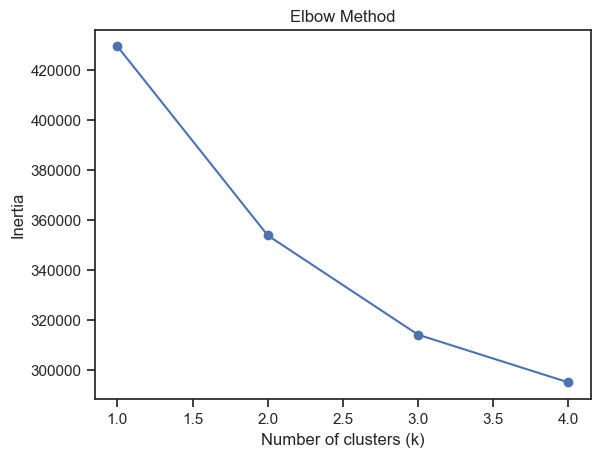

In [23]:
# Determine the optimal number of clusters (k)
# One common approach is the Elbow method, which involves plotting the sum of squared distances (inertia) for different k values and finding the "elbow point."
inertia = []
k_values = list(range(1, 5))  # You can adjust the range of k values as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [24]:
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.21428050403582746


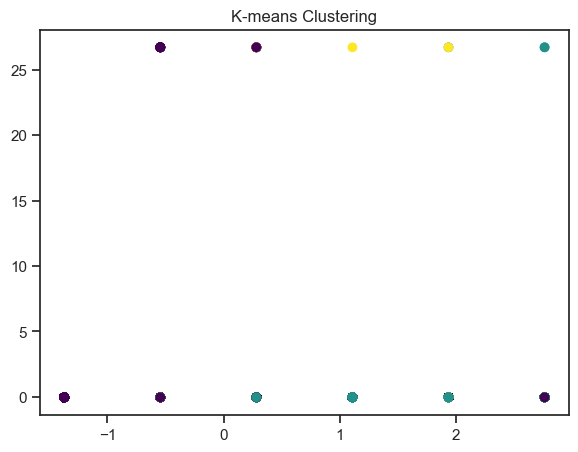

In [25]:
# Calculate silhouette scores
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)

print(f"K-means Silhouette Score: {kmeans_silhouette}")

# Visualize clusters (using first two variables as an example)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')

plt.show()